In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import os, re
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from IPython.display import IFrame
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
path_to_data = './crime'
cd = os.path.dirname(os.path.abspath(path_to_data))

i = 0
columns = range(1,100)
dfList = []

for root, dirs, files in os.walk(cd):
    for fname in files:
        if re.match("^.*.csv$", fname):
            frame = pd.read_csv(os.path.join(root, fname))
            frame['key'] = "file{}".format(i)
            dfList.append(frame)
            i += 1
            
dataset = pd.concat(dfList)

In [3]:
dataset.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key
0,5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...,2020-08,West Midlands Police,West Midlands Police,-0.195929,51.668072,On or near Greenacre Close,E01000254,Barnet 001D,Public order,Unable to prosecute suspect,NaN,file0
1,b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...,2020-08,West Midlands Police,West Midlands Police,-0.192425,51.640933,On or near Sports/Recreation Area,E01000279,Barnet 007C,Public order,Investigation complete; no suspect identified,NaN,file0
2,4a4a7f67480a71be7bc6028c68b9b33fee5a75a0ffb20a...,2020-08,West Midlands Police,West Midlands Police,-0.195913,51.621132,On or near Shortgate,E01000276,Barnet 020A,Robbery,Investigation complete; no suspect identified,NaN,file0
3,7aeed0fbd880da12ee8a6ae698bf2785a94aec8c28084e...,2020-08,West Midlands Police,West Midlands Police,-0.195812,51.589451,On or near Falloden Way,E01000211,Barnet 035C,Robbery,Unable to prosecute suspect,NaN,file0
4,9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...,2020-08,West Midlands Police,West Midlands Police,-0.199223,51.568533,On or near Dunstan Road,E01000146,Barnet 038D,Public order,Investigation complete; no suspect identified,NaN,file0


In [4]:
print(dataset.shape)

(1181058, 13)


In [5]:
name_number = 'dataset.csv'
dataset.to_csv(name_number, index=False)

In [6]:
data = pd.read_csv(name_number)

In [7]:
data['Crime type'].value_counts()

Violence and sexual offences    489516
Anti-social behaviour           160083
Public order                    101160
Vehicle crime                    89781
Criminal damage and arson        86517
Burglary                         59547
Other theft                      59520
Shoplifting                      39225
Robbery                          23463
Drugs                            21267
Other crime                      21180
Possession of weapons            14178
Bicycle theft                     7812
Theft from the person             7809
Name: Crime type, dtype: int64

In [8]:
data['Month'].value_counts()

2021-07    103824
2021-06    100605
2021-03     96345
2021-05     95769
2020-11     91824
2021-04     89907
2020-12     89850
2020-10     89730
2021-01     87351
2020-08     85353
2020-09     84525
2020-07     83250
2021-02     82725
Name: Month, dtype: int64

In [9]:
data['town'] = data['LSOA name'].str.split(' ').str[0]

In [10]:
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
0,5e70cb1ff89df7fb6f4579a18cef84ab0529c9e077c229...,2020-08,West Midlands Police,West Midlands Police,-0.195929,51.668072,On or near Greenacre Close,E01000254,Barnet 001D,Public order,Unable to prosecute suspect,NaN,file0,Barnet
1,b70a6e6bb122531fb9e87fedb6ab19115364b97ba3adab...,2020-08,West Midlands Police,West Midlands Police,-0.192425,51.640933,On or near Sports/Recreation Area,E01000279,Barnet 007C,Public order,Investigation complete; no suspect identified,NaN,file0,Barnet
2,4a4a7f67480a71be7bc6028c68b9b33fee5a75a0ffb20a...,2020-08,West Midlands Police,West Midlands Police,-0.195913,51.621132,On or near Shortgate,E01000276,Barnet 020A,Robbery,Investigation complete; no suspect identified,NaN,file0,Barnet
3,7aeed0fbd880da12ee8a6ae698bf2785a94aec8c28084e...,2020-08,West Midlands Police,West Midlands Police,-0.195812,51.589451,On or near Falloden Way,E01000211,Barnet 035C,Robbery,Unable to prosecute suspect,NaN,file0,Barnet
4,9f50cd3c8c235cbf8b4cb27d379e3dcabfcb7957d0ac32...,2020-08,West Midlands Police,West Midlands Police,-0.199223,51.568533,On or near Dunstan Road,E01000146,Barnet 038D,Public order,Investigation complete; no suspect identified,NaN,file0,Barnet


In [11]:
towns = ['Wolverhampton']
filtered_data = data[data.town.str.contains('|'.join(towns), na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
25601,NaN,2020-08,West Midlands Police,West Midlands Police,-2.120876,52.616025,On or near Stanley Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton
25602,NaN,2020-08,West Midlands Police,West Midlands Police,-2.121066,52.615251,On or near Purcell Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton
25603,NaN,2020-08,West Midlands Police,West Midlands Police,-2.118919,52.618742,On or near Short Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton
25604,NaN,2020-08,West Midlands Police,West Midlands Police,-2.127385,52.619488,On or near Crathorne Avenue,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton
25605,NaN,2020-08,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton


In [12]:
filtered_data['Crime type'].value_counts()

Violence and sexual offences    50229
Anti-social behaviour           14205
Public order                     9531
Criminal damage and arson        8184
Vehicle crime                    7827
Other theft                      5646
Burglary                         5085
Shoplifting                      4278
Other crime                      2286
Robbery                          1659
Drugs                            1635
Possession of weapons            1383
Bicycle theft                     921
Theft from the person             903
Name: Crime type, dtype: int64

In [13]:
filtered_data['LSOA code'].value_counts().nlargest(10)

E01010521    6726
E01010564    3048
E01010414    2382
E01010450    2058
E01010473    1761
E01010410    1737
E01010472    1623
E01010476    1596
E01010464    1404
E01010528    1377
Name: LSOA code, dtype: int64

In [14]:
filtered_important_data = filtered_data[['LSOA code','Crime type']]
filtered_important_data.head()

,LSOA code,Crime type
25601,E01010434,Anti-social behaviour
25602,E01010434,Anti-social behaviour
25603,E01010434,Anti-social behaviour
25604,E01010434,Anti-social behaviour
25605,E01010434,Anti-social behaviour


In [15]:
filtered_important_data = filtered_data[['LSOA code','Crime type']]
filtered_important_data = pd.get_dummies(filtered_important_data, columns=['Crime type'])
clustering_data = filtered_important_data.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour':'sum',
'Crime type_Bicycle theft':'sum',
'Crime type_Burglary':'sum',
'Crime type_Criminal damage and arson':'sum',
'Crime type_Drugs':'sum',
'Crime type_Other crime':'sum',
'Crime type_Other theft':'sum',
'Crime type_Possession of weapons':'sum',
'Crime type_Public order':'sum',
'Crime type_Robbery':'sum',
'Crime type_Shoplifting':'sum',
'Crime type_Theft from the person':'sum',
'Crime type_Vehicle crime':'sum',
'Crime type_Violence and sexual offences':'sum'}).reset_index()

In [16]:
clustering_data[:5]

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,246.0,18,78,117.0,21,21,321.0,18,156.0,27,63.0,9,141,501.0
1,E01010411,36.0,0,24,33.0,9,21,15.0,12,45.0,0,0.0,0,21,297.0
2,E01010412,162.0,0,27,105.0,9,15,15.0,9,102.0,12,0.0,3,93,600.0
3,E01010413,78.0,6,24,45.0,0,18,39.0,6,60.0,21,180.0,0,39,324.0
4,E01010414,288.0,27,135,132.0,39,51,129.0,18,183.0,42,198.0,33,237,870.0


In [17]:
clustering_data_original = clustering_data.copy()
clustering_data_original.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01010410,246.0,18,78,117.0,21,21,321.0,18,156.0,27,63.0,9,141,501.0
1,E01010411,36.0,0,24,33.0,9,21,15.0,12,45.0,0,0.0,0,21,297.0
2,E01010412,162.0,0,27,105.0,9,15,15.0,9,102.0,12,0.0,3,93,600.0
3,E01010413,78.0,6,24,45.0,0,18,39.0,6,60.0,21,180.0,0,39,324.0
4,E01010414,288.0,27,135,132.0,39,51,129.0,18,183.0,42,198.0,33,237,870.0


In [18]:
clustering_data.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,246.0,18,78,117.0,21,21,321.0,18,156.0,27,63.0,9,141,501.0
1,36.0,0,24,33.0,9,21,15.0,12,45.0,0,0.0,0,21,297.0
2,162.0,0,27,105.0,9,15,15.0,9,102.0,12,0.0,3,93,600.0
3,78.0,6,24,45.0,0,18,39.0,6,60.0,21,180.0,0,39,324.0
4,288.0,27,135,132.0,39,51,129.0,18,183.0,42,198.0,33,237,870.0


In [19]:
data_scaled = normalize(clustering_data)
data_scaled = pd.DataFrame(data_scaled, columns=clustering_data.columns)
data_scaled.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.353288,0.025850,0.112018,0.168027,0.030159,0.030159,0.460997,0.025850,0.224036,0.038775,0.090476,0.012925,0.202494,0.719500
1,0.117091,0.000000,0.078061,0.107334,0.029273,0.068303,0.048788,0.039030,0.146364,0.000000,0.000000,0.000000,0.068303,0.966003
2,0.250624,0.000000,0.041771,0.162441,0.013924,0.023206,0.023206,0.013924,0.157800,0.018565,0.000000,0.004641,0.143877,0.928237
3,0.199060,0.015312,0.061249,0.114842,0.000000,0.045937,0.099530,0.015312,0.153123,0.053593,0.459369,0.000000,0.099530,0.826864
4,0.283909,0.026617,0.133083,0.130125,0.038446,0.050276,0.127168,0.017744,0.180401,0.041403,0.195188,0.032531,0.233634,0.857643


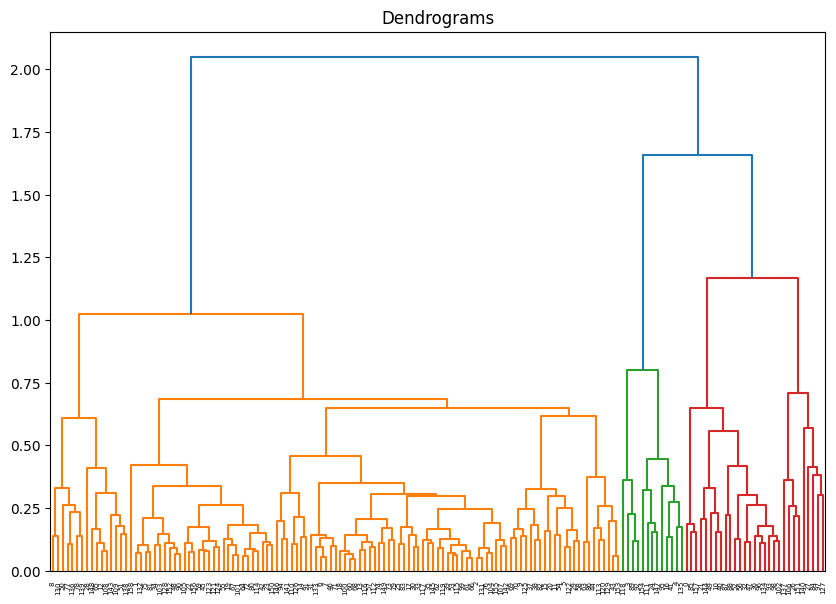

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

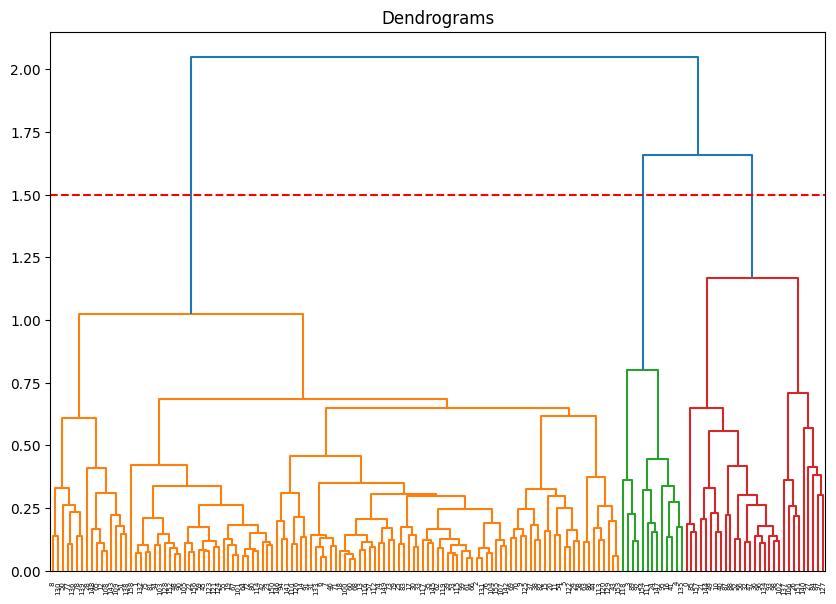

In [21]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.5, color='r', linestyle='--')

In [22]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_ids = cluster.fit_predict(data_scaled)

In [23]:
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,246.0,18,78,117.0,21,21,321.0,18,156.0,27,63.0,9,141,501.0,0
1,36.0,0,24,33.0,9,21,15.0,12,45.0,0,0.0,0,21,297.0,1
2,162.0,0,27,105.0,9,15,15.0,9,102.0,12,0.0,3,93,600.0,1
3,78.0,6,24,45.0,0,18,39.0,6,60.0,21,180.0,0,39,324.0,2
4,288.0,27,135,132.0,39,51,129.0,18,183.0,42,198.0,33,237,870.0,2


In [24]:
hiarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,102.5,4.7,30.7,36.6,9.2,10.6,47.3,6.6,52.8,9.9,8.0,3.1,50.4,217.6
1,76.8,3.7,28.4,51.3,9.3,14.9,26.8,8.4,53.1,8.3,10.0,3.7,43.8,322.5
2,173.1,27.5,67.2,86.1,21.5,18.2,87.2,16.2,137.5,30.9,221.5,29.5,95.8,476.3


In [110]:
clustering_data_original['cluster'] = cluster_ids
clusters = clustering_data_original[['LSOA code', 'cluster']]

In [26]:
clusters.head()

,LSOA code,cluster
0,E01010410,0
1,E01010411,1
2,E01010412,1
3,E01010413,2
4,E01010414,2


In [27]:
clustered_full = pd.merge(filtered_data, clusters, on='LSOA code')
clustered_full.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,NaN,2020-08,West Midlands Police,West Midlands Police,-2.120876,52.616025,On or near Stanley Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
1,NaN,2020-08,West Midlands Police,West Midlands Police,-2.121066,52.615251,On or near Purcell Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
2,NaN,2020-08,West Midlands Police,West Midlands Police,-2.118919,52.618742,On or near Short Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
3,NaN,2020-08,West Midlands Police,West Midlands Police,-2.127385,52.619488,On or near Crathorne Avenue,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
4,NaN,2020-08,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2


In [28]:
def get_color(cluster_id):
    if cluster_id == 1:
        return 'darkred'
    if cluster_id == 0:
        return 'green'
    if cluster_id == 2:
        return 'yellow'

In [29]:
#create a map
this_map = folium.Map(location =[clustered_full["Latitude"].mean(), clustered_full["Longitude"].mean()], zoom_start=5)

def plot_dot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude], radius=2, color=point.color,
                        weight=1).add_to(this_map)

clustered_full["color"] = clustered_full["cluster"].apply(lambda x: get_color(x))

#use df.apply(,axis=1) to iterate through every row in your dataframe
clustered_full.apply(plot_dot, axis = 1)

#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save(os.path.join('Crime_map.html'))

### Changing the number of clusters to 1.25

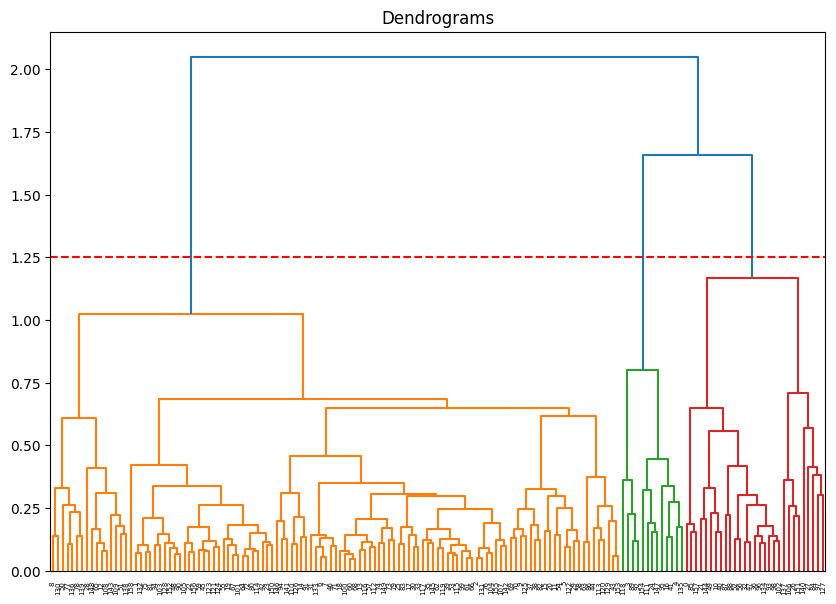

In [30]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=1.25, color='r', linestyle='--')

In [31]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_ids = cluster.fit_predict(data_scaled)

In [32]:
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,246.0,18,78,117.0,21,21,321.0,18,156.0,27,63.0,9,141,501.0,0
1,36.0,0,24,33.0,9,21,15.0,12,45.0,0,0.0,0,21,297.0,1
2,162.0,0,27,105.0,9,15,15.0,9,102.0,12,0.0,3,93,600.0,1
3,78.0,6,24,45.0,0,18,39.0,6,60.0,21,180.0,0,39,324.0,2
4,288.0,27,135,132.0,39,51,129.0,18,183.0,42,198.0,33,237,870.0,2


In [33]:
hiarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,102.5,4.7,30.7,36.6,9.2,10.6,47.3,6.6,52.8,9.9,8.0,3.1,50.4,217.6
1,76.8,3.7,28.4,51.3,9.3,14.9,26.8,8.4,53.1,8.3,10.0,3.7,43.8,322.5
2,173.1,27.5,67.2,86.1,21.5,18.2,87.2,16.2,137.5,30.9,221.5,29.5,95.8,476.3


**By observation, the clustering results show that**
- Cluster ID 2 is the LSOA codes with highest number of crimes (High risk areas).
- Cluster ID 1 is the LSOA codes with lowest number of crimes (lower/mild risk areas).
- Cluster ID 0 is the rest of the LSOA codes where crime are moderate (moderate number of crimes).

In [34]:
clustering_data_original['cluster'] = cluster_ids
clusters = clustering_data_original[['LSOA code', 'cluster']]

In [35]:
clusters.head()

,LSOA code,cluster
0,E01010410,0
1,E01010411,1
2,E01010412,1
3,E01010413,2
4,E01010414,2


In [36]:
clustered_full = pd.merge(filtered_data, clusters, on='LSOA code')
clustered_full.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,NaN,2020-08,West Midlands Police,West Midlands Police,-2.120876,52.616025,On or near Stanley Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
1,NaN,2020-08,West Midlands Police,West Midlands Police,-2.121066,52.615251,On or near Purcell Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
2,NaN,2020-08,West Midlands Police,West Midlands Police,-2.118919,52.618742,On or near Short Road,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
3,NaN,2020-08,West Midlands Police,West Midlands Police,-2.127385,52.619488,On or near Crathorne Avenue,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2
4,NaN,2020-08,West Midlands Police,West Midlands Police,-2.129703,52.619162,On or near Supermarket,E01010434,Wolverhampton 001A,Anti-social behaviour,NaN,NaN,file0,Wolverhampton,2


### Using a different town - Dudley

In [91]:
towns = ['Dudley']
filtered_data = data[data.town.str.contains('|'.join(towns), na=False)]
filtered_data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town
15655,NaN,2020-08,West Midlands Police,West Midlands Police,-2.075461,52.548513,On or near Higgins Avenue,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley
15656,NaN,2020-08,West Midlands Police,West Midlands Police,-2.084685,52.551968,On or near Anvil Crescent,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley
15657,NaN,2020-08,West Midlands Police,West Midlands Police,-2.083943,52.549631,On or near Bell Street,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley
15658,NaN,2020-08,West Midlands Police,West Midlands Police,-2.082189,52.549911,On or near The Crucible,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley
15659,NaN,2020-08,West Midlands Police,West Midlands Police,-2.084685,52.551968,On or near Anvil Crescent,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley


In [92]:
filtered_data['Crime type'].value_counts()

Violence and sexual offences    43086
Anti-social behaviour           14343
Public order                     9048
Criminal damage and arson        7971
Vehicle crime                    7749
Burglary                         5604
Other theft                      4509
Shoplifting                      4239
Other crime                      2004
Robbery                          1434
Drugs                            1407
Possession of weapons             921
Theft from the person             411
Bicycle theft                     315
Name: Crime type, dtype: int64

In [93]:
filtered_data['LSOA code'].value_counts().nlargest(10)

E01009741    3099
E01009881    2331
E01009889    2151
E01009892    1911
E01009744    1866
E01009856    1833
E01009746    1812
E01009733    1710
E01009757    1614
E01009836    1569
Name: LSOA code, dtype: int64

In [94]:
filtered_important_data = filtered_data[['LSOA code','Crime type']]
filtered_important_data.head()

,LSOA code,Crime type
15655,E01009763,Anti-social behaviour
15656,E01009763,Anti-social behaviour
15657,E01009763,Anti-social behaviour
15658,E01009763,Anti-social behaviour
15659,E01009763,Anti-social behaviour


In [95]:
filtered_important_data = filtered_data[['LSOA code','Crime type']]
filtered_important_data = pd.get_dummies(filtered_important_data, columns=['Crime type'])
clustering_data = filtered_important_data.groupby(['LSOA code']).agg({'Crime type_Anti-social behaviour':'sum',
'Crime type_Bicycle theft':'sum',
'Crime type_Burglary':'sum',
'Crime type_Criminal damage and arson':'sum',
'Crime type_Drugs':'sum',
'Crime type_Other crime':'sum',
'Crime type_Other theft':'sum',
'Crime type_Possession of weapons':'sum',
'Crime type_Public order':'sum',
'Crime type_Robbery':'sum',
'Crime type_Shoplifting':'sum',
'Crime type_Theft from the person':'sum',
'Crime type_Vehicle crime':'sum',
'Crime type_Violence and sexual offences':'sum'}).reset_index()

In [96]:
clustering_data[:5]

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01009719,33.0,0,6,24,3,0,3,0,15,3,0.0,0,21,84.0
1,E01009720,15.0,0,21,9,3,6,3,0,3,0,0.0,0,6,54.0
2,E01009721,120.0,6,51,54,21,12,30,12,42,3,3.0,9,42,276.0
3,E01009722,9.0,0,12,3,0,0,0,0,9,3,0.0,3,9,66.0
4,E01009723,18.0,0,18,18,3,6,21,0,9,3,84.0,0,18,45.0


In [97]:
clustering_data_original = clustering_data.copy()
clustering_data_original.head()

,LSOA code,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,E01009719,33.0,0,6,24,3,0,3,0,15,3,0.0,0,21,84.0
1,E01009720,15.0,0,21,9,3,6,3,0,3,0,0.0,0,6,54.0
2,E01009721,120.0,6,51,54,21,12,30,12,42,3,3.0,9,42,276.0
3,E01009722,9.0,0,12,3,0,0,0,0,9,3,0.0,3,9,66.0
4,E01009723,18.0,0,18,18,3,6,21,0,9,3,84.0,0,18,45.0


In [98]:
clustering_data.drop(['LSOA code'], axis = 1, inplace = True, errors = 'ignore')
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,33.0,0,6,24,3,0,3,0,15,3,0.0,0,21,84.0
1,15.0,0,21,9,3,6,3,0,3,0,0.0,0,6,54.0
2,120.0,6,51,54,21,12,30,12,42,3,3.0,9,42,276.0
3,9.0,0,12,3,0,0,0,0,9,3,0.0,3,9,66.0
4,18.0,0,18,18,3,6,21,0,9,3,84.0,0,18,45.0


In [99]:
data_scaled = normalize(clustering_data)
data_scaled = pd.DataFrame(data_scaled, columns=clustering_data.columns)
data_scaled.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
0,0.339467,0.000000,0.061721,0.246885,0.030861,0.000000,0.030861,0.000000,0.154303,0.030861,0.000000,0.000000,0.216025,0.864099
1,0.244558,0.000000,0.342381,0.146735,0.048912,0.097823,0.048912,0.000000,0.048912,0.000000,0.000000,0.000000,0.097823,0.880409
2,0.376872,0.018844,0.160171,0.169593,0.065953,0.037687,0.094218,0.037687,0.131905,0.009422,0.009422,0.028265,0.131905,0.866807
3,0.130312,0.000000,0.173749,0.043437,0.000000,0.000000,0.000000,0.000000,0.130312,0.043437,0.000000,0.043437,0.130312,0.955619
4,0.171991,0.000000,0.171991,0.171991,0.028665,0.057330,0.200656,0.000000,0.085996,0.028665,0.802625,0.000000,0.171991,0.429978


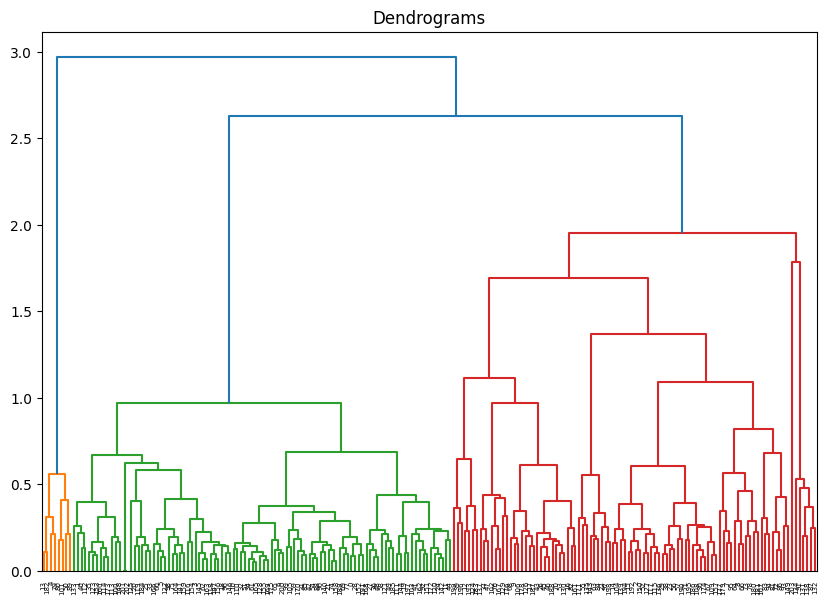

In [100]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

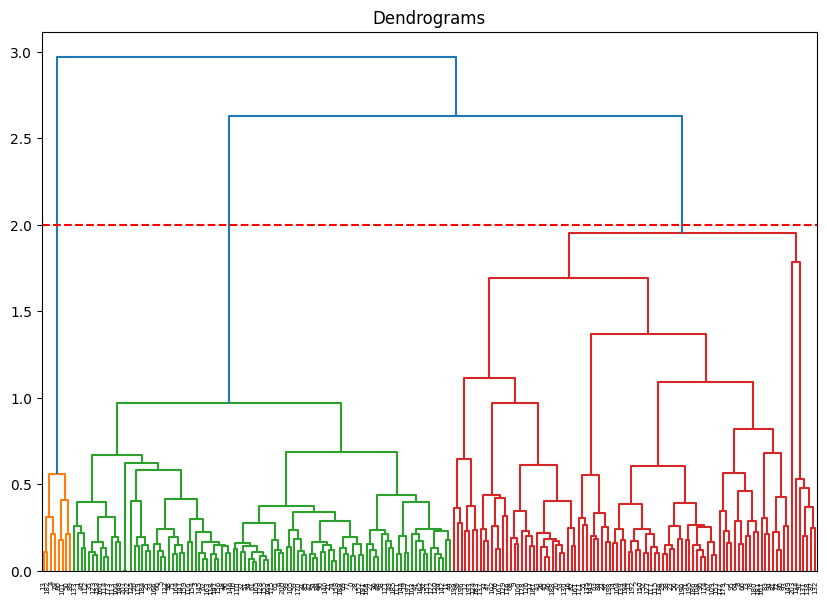

In [101]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

In [102]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_ids = cluster.fit_predict(data_scaled)

In [103]:
clustering_data['cluster'] = cluster_ids
clustering_data.head()

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences,cluster
0,33.0,0,6,24,3,0,3,0,15,3,0.0,0,21,84.0,2
1,15.0,0,21,9,3,6,3,0,3,0,0.0,0,6,54.0,2
2,120.0,6,51,54,21,12,30,12,42,3,3.0,9,42,276.0,0
3,9.0,0,12,3,0,0,0,0,9,3,0.0,3,9,66.0,2
4,18.0,0,18,18,3,6,21,0,9,3,84.0,0,18,45.0,1


In [104]:
hiarchical_cluster = pd.DataFrame(round(clustering_data.groupby('cluster').mean(),1))
hiarchical_cluster

,Crime type_Anti-social behaviour,Crime type_Bicycle theft,Crime type_Burglary,Crime type_Criminal damage and arson,Crime type_Drugs,Crime type_Other crime,Crime type_Other theft,Crime type_Possession of weapons,Crime type_Public order,Crime type_Robbery,Crime type_Shoplifting,Crime type_Theft from the person,Crime type_Vehicle crime,Crime type_Violence and sexual offences
cluster,,,,,,,,,,,,,,
0,71.3,1.8,26.5,34.2,5.6,6.8,21.8,4.1,36.7,6.8,22.2,2.2,39.7,151.5
1,36.4,1.5,22.9,22.5,3.4,4.5,12.8,3.0,27.4,7.9,145.1,1.1,33.0,104.6
2,72.0,1.3,28.8,45.1,8.5,13.1,23.2,5.1,53.1,7.2,9.5,1.9,36.8,277.1


**By observation, the clustering results show that**
- Cluster ID 2 is the LSOA codes with highest number of crimes (High risk areas).
- Cluster ID 1 is the LSOA codes with lowest number of crimes (lower/mild risk areas).
- Cluster ID 0 is the rest of the LSOA codes where crime are moderate (moderate number of crimes).

**Cluster ID 2 and 0 also have similar crime rate**

In [105]:
clustering_data_original['cluster'] = cluster_ids
clusters = clustering_data_original[['LSOA code', 'cluster']]

In [106]:
clusters.head()

,LSOA code,cluster
0,E01009719,2
1,E01009720,2
2,E01009721,0
3,E01009722,2
4,E01009723,1


In [107]:
clustered_full = pd.merge(filtered_data, clusters, on='LSOA code')
clustered_full.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,key,town,cluster
0,NaN,2020-08,West Midlands Police,West Midlands Police,-2.075461,52.548513,On or near Higgins Avenue,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley,2
1,NaN,2020-08,West Midlands Police,West Midlands Police,-2.084685,52.551968,On or near Anvil Crescent,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley,2
2,NaN,2020-08,West Midlands Police,West Midlands Police,-2.083943,52.549631,On or near Bell Street,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley,2
3,NaN,2020-08,West Midlands Police,West Midlands Police,-2.082189,52.549911,On or near The Crucible,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley,2
4,NaN,2020-08,West Midlands Police,West Midlands Police,-2.084685,52.551968,On or near Anvil Crescent,E01009763,Dudley 001A,Anti-social behaviour,NaN,NaN,file0,Dudley,2


In [108]:
def get_color(cluster_id):
    if cluster_id == 1:
        return 'darkred'
    if cluster_id == 0:
        return 'green'
    if cluster_id == 2:
        return 'yellow'

In [109]:
#create a map
this_map = folium.Map(location =[clustered_full["Latitude"].mean(), clustered_full["Longitude"].mean()], zoom_start=5)

def plot_dot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.Latitude, point.Longitude], radius=2, color=point.color,
                        weight=1).add_to(this_map)

clustered_full["color"] = clustered_full["cluster"].apply(lambda x: get_color(x))

#use df.apply(,axis=1) to iterate through every row in your dataframe
clustered_full.apply(plot_dot, axis = 1)

#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#Save the map to an HTML file
this_map.save(os.path.join('Dudley_Crime_map.html'))

**From the clustering perfomed above in Dudley, the following can be stated**

- The following areas have high crime rate: 
     - Brierly Hill, Netherton, Kates Hill, Russells Hall
- The following areas have low crime rate:
     - Lower Gonal, Sedgley, Woodsetton, Stourbridge have low crime rate
     
This can be backed up by information in this article - https://www.birminghammail.co.uk/black-country/dudleys-most-crime-hit-areas-18743396